In [2]:
#load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import re
import string
import joblib
import streamlit as st
import requests
from sklearn.feature_extraction.text import TfidfVectorizer



In [3]:
# Load the datasets
df_fake = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Documents\dataset\Fake.csv\Fake.csv")
df_true = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Documents\dataset\True.csv\True.csv")



In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# Label classes
df_fake["class"] = 0
df_true["class"] = 1

In [7]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [8]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [10]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [11]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
df_fake_manual_testing["class"] = 0
df_true_manual_testing = df_true.tail(10)
df_true_manual_testing["class"] = 1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13248\1239077548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13248\1239077548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [12]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23461,REPORT: ‘Federal Government Escalated the Viol...,KILLED: Rancher and protest spokesman Robert ...,Middle-east,"January 28, 2016",0
23462,"BOILER ROOM – Oregon Standoff, Cuddle Parties,...",Tune in to the Alternate Current Radio Network...,Middle-east,"January 28, 2016",0
23463,"Eyewitness Says Feds Ambushed Bundys, 100 Shot...",Patrick Henningsen 21st Century Wire UPDATE: 1...,Middle-east,"January 27, 2016",0
23464,Episode #119 – SUNDAY WIRE: ‘You Know the Dril...,Episode #119 of SUNDAY WIRE SHOW finally resum...,Middle-east,"January 24, 2016",0
23465,‘There’ll be boots on the ground’: US making n...,21st Century Wire says Various parties in Wash...,Middle-east,"January 23, 2016",0
23466,Boston Brakes? How to Hack a New Car With Your...,21st Century Wire says For those who still ref...,Middle-east,"January 22, 2016",0
23467,Oregon Governor Says Feds ‘Must Act’ Against P...,"21st Century Wire says So far, after nearly 20...",Middle-east,"January 21, 2016",0
23468,Ron Paul on Burns Oregon Standoff and Jury Nul...,21st Century Wire says If you ve been followin...,Middle-east,"January 21, 2016",0
23469,BOILER ROOM: As the Frogs Slowly Boil – EP #40,Tune in to the Alternate Current Radio Network...,Middle-east,"January 20, 2016",0
23470,Arizona Rancher Protesting in Oregon is Target...,RTOne of the most visible members of the armed...,Middle-east,"January 20, 2016",0


In [13]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv")

In [24]:
# Combine both dataframes
df_merge = pd.concat([df_fake, df_true], axis=0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [26]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [28]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [30]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [32]:
df = df.sample(frac = 1)


In [34]:
df.head()

,text,class
16468,Will the State Department ever tell the truth ...,0
18507,Protesters affiliated with the group No Justic...,0
21069,The party of diversity waits for Hillary to ...,0
11873,Protesters who take to the streets in North Da...,0
1119,NEW YORK (Reuters) - President Donald Trump’s ...,1


In [36]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [38]:
df.columns

Index(['text', 'class'], dtype='object')

In [40]:
df.head()

,text,class
0,Will the State Department ever tell the truth ...,0
1,Protesters affiliated with the group No Justic...,0
2,The party of diversity waits for Hillary to ...,0
3,Protesters who take to the streets in North Da...,0
4,NEW YORK (Reuters) - President Donald Trump’s ...,1


In [42]:
def wordopt(text):
    text = text.lower()  # Lowercase conversion
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(f'[{string.punctuation}]', '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

In [44]:
# Apply preprocessing to text column
df_merge["text"] = df_merge["text"].apply(wordopt)

In [45]:
# Split the data into features and target
x = df_merge["text"]
y = df_merge["class"]

In [46]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y)




In [47]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)


In [48]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(xv_train, y_train)

# Check the balance of the resampled training data
print(f"Original class distribution: {y_train.value_counts()}")
print(f"Resampled class distribution: {y_train_smote.value_counts()}")

Original class distribution: class
0    18777
1    17125
Name: count, dtype: int64
Resampled class distribution: class
0    18777
1    18777
Name: count, dtype: int64


In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import joblib

# Train and evaluate Naive Bayes model using cross-validation
nb_model = MultinomialNB()
nb_scores = cross_val_score(nb_model, x_train_smote, y_train_smote, cv=5)
print("Naive Bayes Cross-Validation Scores:", nb_scores)

# Train final Naive Bayes model after cross-validation
nb_model.fit(x_train_smote, y_train_smote)

# Save the Naive Bayes model and vectorizer for future use
joblib.dump(nb_model, "NB_model_crossval.jb")
joblib.dump(vectorizer, "vectorizer_crossval.jb")


Naive Bayes Cross-Validation Scores: [0.9174544  0.92064971 0.93675942 0.93928904 0.93715047]


['vectorizer_crossval.jb']

In [50]:
print("NB Mean Cross-Validation Accuracy:", nb_scores.mean())


NB Mean Cross-Validation Accuracy: 0.9302606084533629


In [51]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [52]:
y_pred = nb_model.predict(xv_test)  # Directly predicts 0 or 1


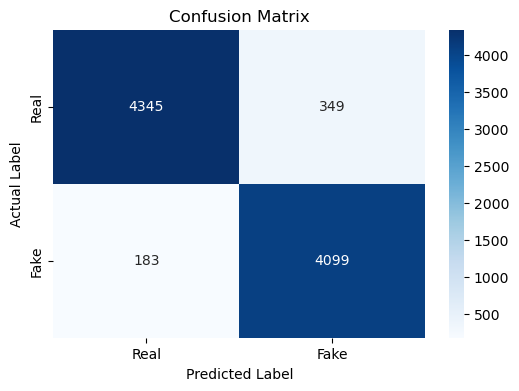

In [53]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


In [54]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      4694
           1       0.92      0.96      0.94      4282

    accuracy                           0.94      8976
   macro avg       0.94      0.94      0.94      8976
weighted avg       0.94      0.94      0.94      8976



In [66]:

joblib.dump(xv_test, "xv_test")


['xv_test']

In [68]:
joblib.dump(y_test, "y_test")

['y_test']